<a href="https://colab.research.google.com/github/SRINIVASDEVARAJULA/MP/blob/main/3L_Lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import math 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
np.random.seed(19)

In [ ]:
df=pd.read_csv("/content/combinedSample_GoldDs.csv")

In [ ]:
df.head()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,14.03.2021 22:00:00.000 GMT-0000,1727.188,1729.078,1727.068,1728.258,64608.9986,1727.662,1730.222,1727.646,1729.522,61275.0016
1,14.03.2021 22:01:00.000 GMT-0000,1728.425,1729.821,1728.415,1729.424,71534.9987,1729.522,1730.421,1729.442,1730.405,80849.9977
2,14.03.2021 22:02:00.000 GMT-0000,1729.468,1730.298,1729.404,1730.118,38320.0012,1730.405,1730.611,1730.275,1730.545,59829.9988
3,14.03.2021 22:03:00.000 GMT-0000,1730.118,1730.304,1728.971,1729.141,26130.0001,1730.535,1730.625,1729.425,1729.765,36355.0000
4,14.03.2021 22:04:00.000 GMT-0000,1729.141,1729.431,1728.318,1728.708,30500.0003,1729.676,1729.862,1728.835,1729.219,49090.0017


In [ ]:
df['Local time']=df['Local time'].str[0:22]
df['Local time']

0         14.03.2021 22:00:00.00
1         14.03.2021 22:01:00.00
2         14.03.2021 22:02:00.00
3         14.03.2021 22:03:00.00
4         14.03.2021 22:04:00.00
                   ...          
371274    11.03.2022 21:55:00.00
371275    11.03.2022 21:56:00.00
371276    11.03.2022 21:57:00.00
371277    11.03.2022 21:58:00.00
371278    11.03.2022 21:59:00.00
Name: Local time, Length: 371279, dtype: object

In [ ]:
df["Open"]=(df["Open_Bid"]+df["Open_Ask"])/2
df["High"]=(df["High_Bid"]+df["High_Ask"])/2
df["Low"]=(df["Low_Bid"]+df["Low_Ask"])/2
df["Close"]=(df["Close_Bid"]+df["Close_Ask"])/2

In [ ]:
df.shape

(371279, 15)

In [ ]:
df=df[:3000]
df.shape

(3000, 15)

In [ ]:

df.head()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Open,High,Low,Close
0,14.03.2021 22:00:00.00,1727.188,1729.078,1727.068,1728.258,64608.9986,1727.662,1730.222,1727.646,1729.522,61275.0016,1727.4250,1729.6500,1727.3570,1728.8900
1,14.03.2021 22:01:00.00,1728.425,1729.821,1728.415,1729.424,71534.9987,1729.522,1730.421,1729.442,1730.405,80849.9977,1728.9735,1730.1210,1728.9285,1729.9145
2,14.03.2021 22:02:00.00,1729.468,1730.298,1729.404,1730.118,38320.0012,1730.405,1730.611,1730.275,1730.545,59829.9988,1729.9365,1730.4545,1729.8395,1730.3315
3,14.03.2021 22:03:00.00,1730.118,1730.304,1728.971,1729.141,26130.0001,1730.535,1730.625,1729.425,1729.765,36355.0000,1730.3265,1730.4645,1729.1980,1729.4530
4,14.03.2021 22:04:00.00,1729.141,1729.431,1728.318,1728.708,30500.0003,1729.676,1729.862,1728.835,1729.219,49090.0017,1729.4085,1729.6465,1728.5765,1728.9635


In [ ]:
data=df.drop(['Local time','Open_Bid','High_Bid','Low_Bid','Close_Bid','Open_Ask','High_Ask','Low_Ask','Close_Ask'],axis=1)

In [ ]:
data=data.drop(['Volume_Bid','Volume_Ask'],axis=1)

In [ ]:
data.head()

,Open,High,Low,Close
0,1727.4250,1729.6500,1727.3570,1728.8900
1,1728.9735,1730.1210,1728.9285,1729.9145
2,1729.9365,1730.4545,1729.8395,1730.3315
3,1730.3265,1730.4645,1729.1980,1729.4530
4,1729.4085,1729.6465,1728.5765,1728.9635


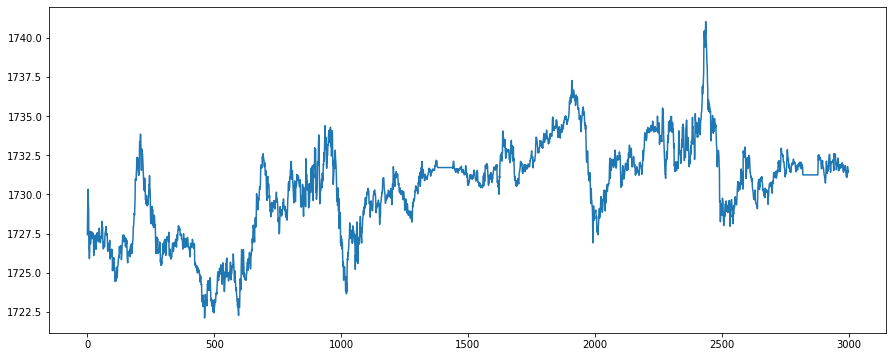

In [ ]:
data['Open'].plot(figsize=(15,6))

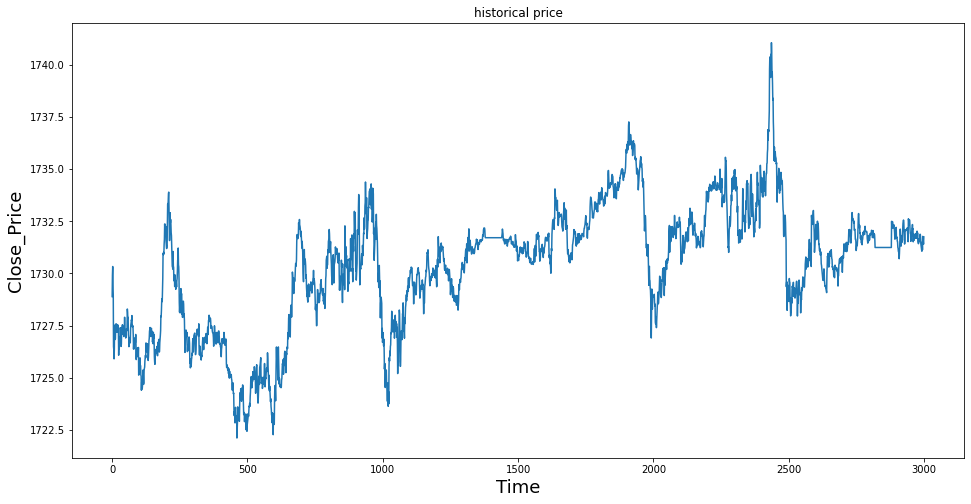

In [ ]:
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(df['Close'])
plt.xlabel('Time', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.show()

In [ ]:
data_mini = data.iloc[-100:] # Select recent data rows
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data_mini.index, open=data_mini['Open'], high=data_mini['High'], low=data_mini['Low'], close=data_mini['Close'])])
fig.show()

In [ ]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .9 ))
validation_data_len = int(np.ceil( len(dataset) * .05 ))
test_data_len = int(np.ceil( len(dataset) * .05 ))
print(training_data_len)
print(validation_data_len)
print(test_data_len)


2700
150
150


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data[:5]

array([[0.35780953],
       [0.41183295],
       [0.43382198],
       [0.38749736],
       [0.3616853 ]])

In [ ]:
#downsizing
data['Volume_Bid']=pd.to_numeric(data['Volume_Bid'],downcast='float')
data['Volume_Ask']=pd.to_numeric(data['Volume_Ask'],downcast='float')
data['Open']=pd.to_numeric(data['Open'],downcast='float')
data['High']=pd.to_numeric(data['High'],downcast='float')
data['Low']=pd.to_numeric(data['Low'],downcast='float')
data['Close']=pd.to_numeric(data['Close'],downcast='float')
data.info()

KeyError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
## Negative volume implies lack of liquidity in the marketdata
data[data.Volume_Bid < 0] #no values 

AttributeError: ignored

In [ ]:
print(data.isna().sum())

Close    0
dtype: int64


In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
valid_data = scaled_data[int(training_data_len)- 60: int(training_data_len) + int(validation_data_len), :]
print(train_data.shape)
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(2700, 1)
[array([0.35780953, 0.41183295, 0.43382198, 0.38749736, 0.3616853 ,
       0.23133305, 0.22334423, 0.20024784, 0.22405611, 0.28522464,
       0.28427547, 0.24920903, 0.25147648, 0.28830943, 0.28108521,
       0.27169901, 0.28838853, 0.26755959, 0.28029424, 0.26914153,
       0.27836954, 0.28609471, 0.27995149, 0.27546931, 0.20955495,
       0.24409407, 0.22458342, 0.2396119 , 0.25595866, 0.25113373,
       0.27916051, 0.27441468, 0.25701329, 0.23170217, 0.23776629,
       0.27177811, 0.27836954, 0.28126977, 0.28654292, 0.26281375,
       0.2823244 , 0.27069711, 0.26175912, 0.25674963, 0.28269352,
       0.27968783, 0.30552626, 0.27942417, 0.2767876 , 0.26281375,
       0.25305843, 0.25595866, 0.27045982, 0.27520565, 0.27125079,
       0.27705126, 0.3263552 , 0.31810272, 0.30244147, 0.30507804])]
[0.2614690993461437]

[array([0.35780953, 0.41183295, 0.43382198, 0.38749736, 0.3616853 ,
       0.23133305, 0.22334423, 0.20024784, 0.22405611, 0.28522464,
       0.28427547, 0.24920

(2640, 60, 1)

In [ ]:
#Split the data into x_valid and y_valid data sets
x_valid = []
y_valid = []

for i in range(60, len(valid_data)):
    x_valid.append(valid_data[i-60:i, 0])
    y_valid.append(valid_data[i, 0])
    if i<= 61:
        print(x_valid)
        print(y_valid)
        print()
        
# Convert the x_valid and y_valid to numpy arrays 
x_valid, y_valid = np.array(x_valid), np.array(y_valid)

#Reshape the data
x_valid = np.reshape(x_valid, (x_valid.shape[0], x_valid.shape[1], 1))
x_valid.shape



[array([0.36777579, 0.4169479 , 0.43453385, 0.45984497, 0.45639106,
       0.46688462, 0.44555474, 0.43854145, 0.43242459, 0.44956233,
       0.44086163, 0.46954756, 0.4703649 , 0.47273782, 0.46327252,
       0.45958131, 0.47139317, 0.47640266, 0.46142691, 0.45425543,
       0.451197  , 0.43168635, 0.43448112, 0.428417  , 0.42614955,
       0.42894432, 0.41106834, 0.40969732, 0.42688779, 0.40558426,
       0.43558848, 0.43717043, 0.42762603, 0.43263552, 0.43052626,
       0.42570133, 0.42854883, 0.43092175, 0.42253744, 0.42622864,
       0.42069184, 0.41054103, 0.38443894, 0.41022464, 0.41027737,
       0.43738135, 0.44212719, 0.45138157, 0.45346446, 0.45399177,
       0.4426545 , 0.45443999, 0.4562065 , 0.4493514 , 0.44885045,
       0.45852668, 0.44592386, 0.4435773 , 0.41929445, 0.44104619])]
[0.46087323349505027]

[array([0.36777579, 0.4169479 , 0.43453385, 0.45984497, 0.45639106,
       0.46688462, 0.44555474, 0.43854145, 0.43242459, 0.44956233,
       0.44086163, 0.46954756, 0.47

(150, 60, 1)

In [ ]:

from keras.callbacks import EarlyStopping
#es = EarlyStopping(monitor='val_loss')
#es = EarlyStopping(monitor='val_loss', mode='min')
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
#es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1)
#es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.4)


In [ ]:

from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU

#Build the LSTM/GRU model
# LSTM Layer returns whole_seq_output, final_memory_state, and final_carry_state 
# GRU Layer whole_sequence_output, and final_state
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))

model.add(LSTM(128, return_sequences= True))
model.add(LSTM(256, return_sequences= False))
model.add(Dense(25,activation="relu", kernel_initializer="uniform"))
model.add(Dense(1,activation="relu"))
#model.add(GRU(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))

# model.add(GRU(128, return_sequences= True))
# model.add(GRU(256, return_sequences= False))
# model.add(Dense(25,activation="relu", kernel_initializer="uniform"))
# model.add(Dense(1,activation="relu"))
print(model.summary())
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
history = model.fit(x_train, y_train, batch_size=1, validation_data=(x_valid, y_valid), epochs=10, callbacks=[es])




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 60, 64)            16896     
                                                                 
 lstm_10 (LSTM)              (None, 60, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 256)               394240    
                                                                 
 dense_6 (Dense)             (None, 25)                6425      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 516,403
Trainable params: 516,403
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
2640/2640 [=====================

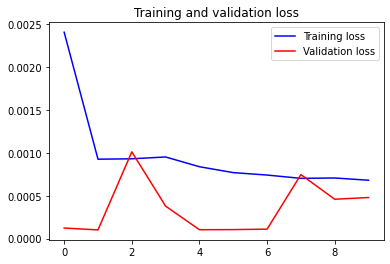

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss)) 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



In [ ]:
test_data = scaled_data[training_data_len + validation_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len + validation_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse



0.4394300916676925

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



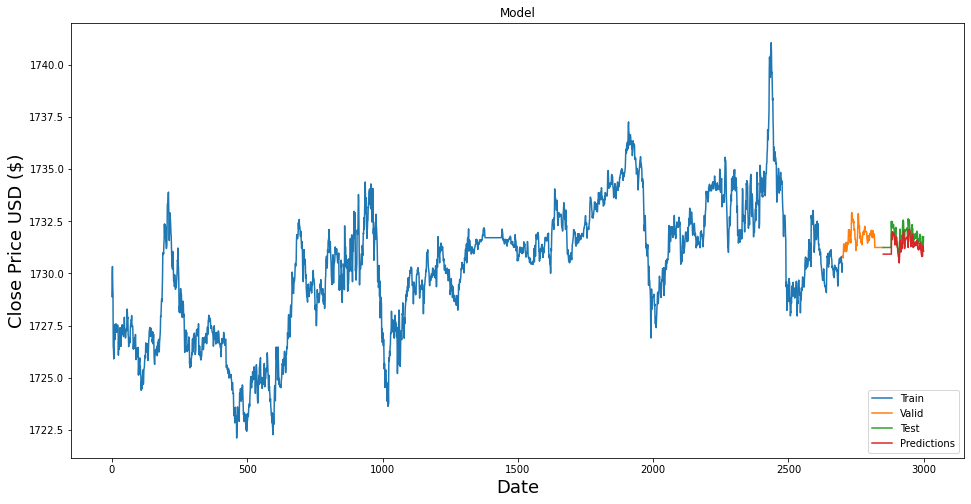

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : training_data_len + validation_data_len]
test = data[training_data_len + validation_data_len:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close']])
plt.plot(test[['Close','Predictions' ]])
plt.legend(['Train', 'Valid',  'Test', 'Predictions'], loc='lower right')
plt.show()



# New Section